# Procurement Analysis in public healthcare

### 1. Import libraries & python packages
### 2. Data Cleaning 
#### - Replace NaN values with 0, change dates (str) to datetime format, drop unused columns, ensure columns of values are same format (whole column is int/str/datetime , etc.
#### - Create new columns for Year & Month
### 3. Analysis
#### - Timeseries analysis 
#### - Spend Analysis
#### - Catogorial Analysis

In [1]:
# Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# use this when we need SQl to conduct queries
import sqlite3

# Establishing a local DB connection:
db_connection = sqlite3.connect('/Users/User/Desktop/alps_excel.sqlite')

# Reading out DataFrames as SQL tables:
master.to_sql(name = 'master', con = db_connection, if_exists = 'replace', index = False)

In [2]:
# Reading CSV to Dataframe
master = pd.read_csv('/Users/User/Desktop/ALPS_Excel_Test/alps_excel.csv',encoding = 'utf-8')

In [3]:
# Renaming columns to remove spaces:
master.columns = ['description','contract_no','institution','start_date','end_date','estimated_annual_purchase_value',
                      'annualised_actual_savings','days','category','approval_to_procurement_date','sourcing_request_receieved_date','launch_of_RFP','RFP_closing_date',
                 'RFP_evaluation_start_date','IT_assessment_start_date','IT_assessment_end_date','RFP_evaluation_end_date','approval_to_award_date',
                 'contract_award_date','contract_effective_date','lead_time']

In [ ]:
master.info()

In [6]:
# Getting the column Labels:  
master.head()

,description,contract_no,institution,start_date,end_date,estimated_annual_purchase_value,annualised_actual_savings,days,category,approval_to_procurement_date,...,launch_of_RFP,RFP_closing_date,RFP_evaluation_start_date,IT_assessment_start_date,IT_assessment_end_date,RFP_evaluation_end_date,approval_to_award_date,contract_award_date,contract_effective_date,lead_time
0,fox,NUHS-MMD-0005,NUH,16-12-2016,23-08-2023,822222.0,44484.0,2441,Pharma,04-05-2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-2022,903
1,crocodile,NUHS-MMD-0023,NUP,19-10-2018,07-10-2022,3898095.0,57084.0,1449,Pharma,02-05-2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17-10-2022,898
2,baboon,NUHS-MMD-0028,NTF,15-10-2016,01-04-2023,2550568.0,89005.0,2359,Medical Supplies,23-08-2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-11-2023,1182
3,gorilla,NUHS-MMD-0010,AH,15-09-2018,13-02-2022,4172524.0,67480.0,1247,Medical Supplies,04-06-2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2023,1240
4,blueberry,NUHS-MMD-0012,NUH,15-06-2020,24-07-2023,1105970.0,63135.0,1134,IT,22-01-2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15-07-2022,905


In [ ]:
# Getting the exact value [row, column ] --> (like index(match()) in excel) :
master.iloc[0,5]

In [ ]:
master.loc[master['contract_no'] == 'NUHS-MMD-0028']

In [ ]:
master.loc[master['contract_no'] == 'NUHS-MMD-0028', 'estimated_annual_purchase_value']

### Drop unused columns

In [15]:
master_compact = master.drop(columns=['sourcing_request_receieved_date','launch_of_RFP','RFP_closing_date', 'RFP_evaluation_start_date','IT_assessment_start_date','IT_assessment_end_date','RFP_evaluation_end_date','approval_to_award_date',
                 'contract_award_date'],
                            index=60)
master_compact

,description,contract_no,institution,start_date,end_date,estimated_annual_purchase_value,annualised_actual_savings,days,category,approval_to_procurement_date,contract_effective_date,lead_time
0,fox,NUHS-MMD-0005,NUH,16-12-2016,23-08-2023,822222.0,44484.0,2441,Pharma,04-05-2020,24-10-2022,903
1,crocodile,NUHS-MMD-0023,NUP,19-10-2018,07-10-2022,3898095.0,57084.0,1449,Pharma,02-05-2020,17-10-2022,898
2,baboon,NUHS-MMD-0028,NTF,15-10-2016,01-04-2023,2550568.0,89005.0,2359,Medical Supplies,23-08-2020,18-11-2023,1182
3,gorilla,NUHS-MMD-0010,AH,15-09-2018,13-02-2022,4172524.0,67480.0,1247,Medical Supplies,04-06-2020,27-10-2023,1240
4,blueberry,NUHS-MMD-0012,NUH,15-06-2020,24-07-2023,1105970.0,63135.0,1134,IT,22-01-2020,15-07-2022,905
5,raspberry,NUHS-MMD-0004,NUH,27-12-2017,24-05-2024,230880.0,42007.0,2340,IT,18-07-2020,08-06-2023,1055
6,durian,NUHS-MMD-0036,NUP,12-09-2017,27-02-2022,2970498.0,92478.0,1629,IT,29-10-2020,24-07-2022,633
7,dragonfruit,NUHS-MMD-0045,NUP,10-10-2017,24-12-2022,3419537.0,83177.0,1901,Services,10-09-2020,11-07-2023,1034
8,dog,NUHS-MMD-0025,AH,06-01-2018,22-03-2022,1366267.0,74230.0,1536,IT,01-10-2020,06-12-2021,431
9,cat,NUHS-MMD-0047,NTF,04-01-2016,02-04-2022,4161360.0,73123.0,2280,Services,05-03-2020,26-05-2023,1177


### Find "NO DATE" values under "start-date" column and remove it

In [19]:
master_compact = master_compact[master_compact['start_date'] != "NO DATE"]


master_compact

,description,contract_no,institution,start_date,end_date,estimated_annual_purchase_value,annualised_actual_savings,days,category,approval_to_procurement_date,contract_effective_date,lead_time
0,fox,NUHS-MMD-0005,NUH,16-12-2016,23-08-2023,822222.0,44484.0,2441,Pharma,04-05-2020,24-10-2022,903
1,crocodile,NUHS-MMD-0023,NUP,19-10-2018,07-10-2022,3898095.0,57084.0,1449,Pharma,02-05-2020,17-10-2022,898
2,baboon,NUHS-MMD-0028,NTF,15-10-2016,01-04-2023,2550568.0,89005.0,2359,Medical Supplies,23-08-2020,18-11-2023,1182
3,gorilla,NUHS-MMD-0010,AH,15-09-2018,13-02-2022,4172524.0,67480.0,1247,Medical Supplies,04-06-2020,27-10-2023,1240
4,blueberry,NUHS-MMD-0012,NUH,15-06-2020,24-07-2023,1105970.0,63135.0,1134,IT,22-01-2020,15-07-2022,905
5,raspberry,NUHS-MMD-0004,NUH,27-12-2017,24-05-2024,230880.0,42007.0,2340,IT,18-07-2020,08-06-2023,1055
6,durian,NUHS-MMD-0036,NUP,12-09-2017,27-02-2022,2970498.0,92478.0,1629,IT,29-10-2020,24-07-2022,633
7,dragonfruit,NUHS-MMD-0045,NUP,10-10-2017,24-12-2022,3419537.0,83177.0,1901,Services,10-09-2020,11-07-2023,1034
8,dog,NUHS-MMD-0025,AH,06-01-2018,22-03-2022,1366267.0,74230.0,1536,IT,01-10-2020,06-12-2021,431
9,cat,NUHS-MMD-0047,NTF,04-01-2016,02-04-2022,4161360.0,73123.0,2280,Services,05-03-2020,26-05-2023,1177


### Changing dates (str)  to date-time format

In [20]:
master_compact['start_date'] = pd.to_datetime(master_compact['start_date'])

### Creating Year & Month columns

In [25]:
master_compact['Year'] = master_compact['start_date'].dt.year
master_compact['Month'] = master_compact['start_date'].dt.month

In [26]:
master_compact.head()

,description,contract_no,institution,start_date,end_date,estimated_annual_purchase_value,annualised_actual_savings,days,category,approval_to_procurement_date,contract_effective_date,lead_time,Year,Month
0,fox,NUHS-MMD-0005,NUH,2016-12-16,23-08-2023,822222.0,44484.0,2441,Pharma,04-05-2020,24-10-2022,903,2016,12
1,crocodile,NUHS-MMD-0023,NUP,2018-10-19,07-10-2022,3898095.0,57084.0,1449,Pharma,02-05-2020,17-10-2022,898,2018,10
2,baboon,NUHS-MMD-0028,NTF,2016-10-15,01-04-2023,2550568.0,89005.0,2359,Medical Supplies,23-08-2020,18-11-2023,1182,2016,10
3,gorilla,NUHS-MMD-0010,AH,2018-09-15,13-02-2022,4172524.0,67480.0,1247,Medical Supplies,04-06-2020,27-10-2023,1240,2018,9
4,blueberry,NUHS-MMD-0012,NUH,2020-06-15,24-07-2023,1105970.0,63135.0,1134,IT,22-01-2020,15-07-2022,905,2020,6


### Using line graph to plot (sorting # of contracts in each year)

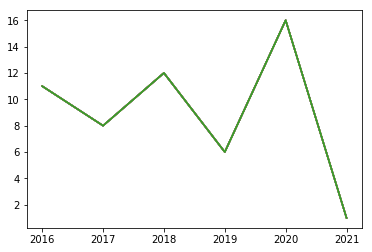

In [43]:
years = [year for year, master in master_compact.groupby('Year')]

plt.plot(years, master_compact.groupby('Year').count())
plt.show()

### Using line graph to plot (sorting # of contracts in year 2016)

In [83]:
year_2020 = master_compact[master_compact['Year'] == 2020]
year_2020

,description,contract_no,institution,start_date,end_date,estimated_annual_purchase_value,annualised_actual_savings,days,category,approval_to_procurement_date,contract_effective_date,lead_time,Year,Month
4,blueberry,NUHS-MMD-0012,NUH,2020-06-15,24-07-2023,1105970.0,63135.0,1134,IT,22-01-2020,15-07-2022,905,2020,6
10,watermelon,NUHS-MMD-0034,NTF,2020-03-05,01-11-2023,2757015.0,98166.0,1277,BME/FFE,11-08-2020,15-09-2022,765,2020,3
14,frog,NUHS-MMD-0009,NUP,2020-12-22,09-09-2022,1232161.0,77601.0,626,BME/FFE,19-08-2020,09-02-2022,539,2020,12
16,crab,NUHS-MMD-0040,AH,2020-10-29,02-08-2025,1912547.0,11425.0,1738,Services,03-01-2020,24-12-2023,1451,2020,10
18,lizard,NUHS-MMD-0048,NUP,2020-06-27,21-05-2022,1835073.0,42629.0,693,Pharma,19-04-2020,31-07-2022,833,2020,6
19,apple,NUHS-MMD-0021,NUH,2020-12-30,20-11-2024,3663469.0,34958.0,1421,Services,29-02-2020,18-07-2022,870,2020,12
26,antelope,NUHS-MMD-0044,NTF,2020-02-14,15-08-2026,519276.0,29295.0,2374,BME/FFE,02-01-2020,17-12-2023,1445,2020,2
28,strawberry,NUHS-MMD-0029,AH,2020-05-27,13-02-2025,4313872.0,96644.0,1723,Medical Supplies,02-03-2020,01-05-2022,790,2020,5
31,shark,NUHS-MMD-0039,NTF,2020-04-25,08-03-2023,459349.0,10657.0,1047,Pharma,15-02-2020,09-12-2022,1028,2020,4
32,goat,NUHS-MMD-0033,AH,2020-09-22,24-02-2024,2297924.0,81992.0,1250,BME/FFE,12-05-2020,07-10-2023,1243,2020,9


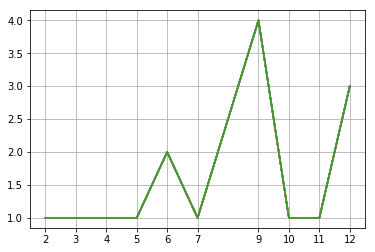

In [85]:
months_in_2020 = [month for month, master in year_2020.groupby('Month')]

plt.plot(months_in_2020, year_2020.groupby('Month').count())
plt.xticks(months_in_2020)
plt.grid()
plt.show()

# Spend Analysis

### Total expense in year 2020

In [86]:
expense_2020 = year_2020['estimated_annual_purchase_value'].sum()

expense_2020

29073416.0

### Spend Analysis across the different months in 2020

<BarContainer object of 10 artists>

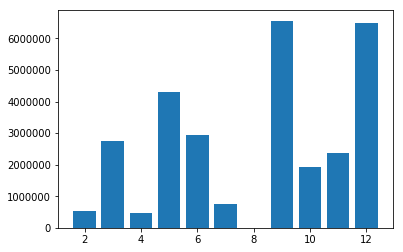

In [87]:
# Using .sum() after .groupby() will combine duplicated values into 1 (e.g multiple Month = 12 is combined into 1)

months_2020 = year_2020.groupby('Month')
monthly_expense_in_2020 = months_2020.sum()['estimated_annual_purchase_value']

months_in_2020 = [month for month, master in year_2020.groupby('Month')]

plt.bar(months_in_2020, monthly_expense_in_2020)

### Spend analysis across different institutions

<BarContainer object of 4 artists>

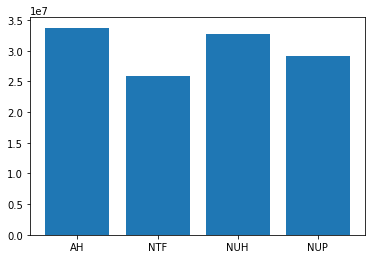

In [80]:
inst = master_compact.groupby('institution')
total_inst_expense = inst.sum()['estimated_annual_purchase_value']

institution = [inst for inst, master in inst]

plt.bar(institution, total_inst_expense)

### Savings Profile across each institution (for all years)

<BarContainer object of 4 artists>

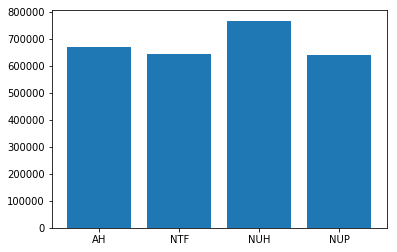

In [90]:
inst = master_compact.groupby('institution')
total_inst_savings = inst.sum()['annualised_actual_savings']

institution = [inst for inst, master in inst]

plt.bar(institution, total_inst_savings)

### Savings Profile across each institution (for 2020)

<BarContainer object of 4 artists>

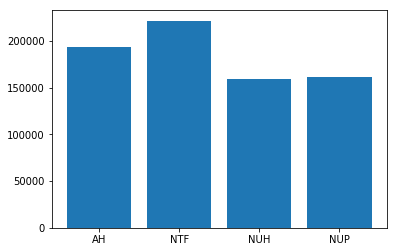

In [99]:
inst_2020 = master_compact[master_compact["Year"] == 2020]
inst_2020 = inst_2020.groupby('institution')

inst_2020_savings = inst_2020.sum()['annualised_actual_savings']

institution = [inst for inst, master in inst_2020]

plt.bar(institution, inst_2020_savings)

### Overview of expense by category 

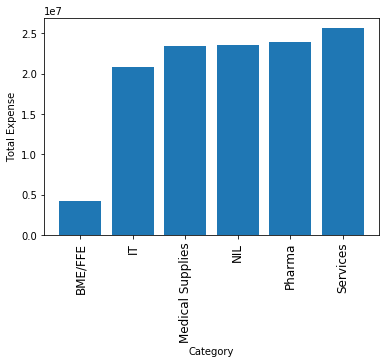

In [135]:
category = master_compact.groupby('category')
total_category = category.sum()['estimated_annual_purchase_value']

cat = [cat for cat , master in category]

plt.bar(cat, total_category.sort_values())
plt.ylabel('Total Expense')
plt.xlabel('Category')
plt.xticks(cat, rotation='vertical', size=12)
plt.show()

In [ ]:
# Getting Estimated Annual Purchase Value and setting them to a `pandas` object:
annual_expense = pd.read_sql('SELECT estimated_annual_purchase_value FROM master', con = db_connection)

# Total:
annual_expense['estimated_annual_purchase_value'].sum()

# Data Cleaning

In [ ]:
# This will show us records where `master['column_name']` is null and assign a value of null value
null_release_mask = master['estimated_annual_purchase_value'].isnull()
master.loc[null_release_mask, 'estimated_annual_purchase_value'] = 0
master[null_release_mask].head()

In [ ]:
# fill up the NaN with a value or string
master.fillna("NIL")

In [ ]:
#verify 'release' does not contain null values (all has to be = 0)
master.isnull().sum()

In [ ]:
# Looking at the unique values in the column can be a good way to find offending values (e.g. finding words in a column of intnumbers):
master.estimated_annual_purchase_value.unique()

In [ ]:
# Slice and assign.
release_mask = master['estimated_annual_purchase_value'] == "!!!weird_value!!!!"
master[release_mask]

###### Clean up the data. Normally we may replace the offending data with null np.nan values, however we previously converted all of the nan values in the release column to zeros so we might as well continue with the same practice. Replacing with 0 (or nan) will allow us to convert the column to numeric.

In [ ]:
master.loc[release_mask, 'estimated_annual_purchase_value'] = np.nan
master['estimated_annual_purchase_value'] = master['estimated_annual_purchase_value'].map(lambda x: float(x))
master.info()